<a href="https://colab.research.google.com/github/Joshi-Hima/Higher-Seconday-Level-Teacher-Prediction/blob/main/Higher_Seconday_Level_Teachers_Prediction_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection and Preprocessing

## Data Sources and Collection
We collected and prepared our data as follows:

**Data Sources:** The data was collected from opendatanepal.

**Challenges**: The challenges faced during the data collection were:

i) missing and inconsistent datasets made it difficult to choose the dataset.

ii) inconsistency in data quality made it difficult to look fo the right dataset for the project.

## Data Preprocessing

In [ ]:
# Necessary libraries for data preprocessing
import pandas as pd
import numpy as np

# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/TechAxis(Data Science)/teachers-at-all-levels-by-types-of-schools-2011-012.csv')
df.head()

,District Name,Primary Level,Lower secondary,Secondary,Higher secondary
0,Taplejung,1646,443,232,118
1,Sankhuwasabha,1740,468,294,120
2,Solukhumbu,1159,234,164,44
3,Panchthar,2264,579,341,114
4,Ilam,2383,698,401,213


In [ ]:
# Handle the missing values of the dataset
df.fillna(method = 'ffill', inplace = True)

<ipython-input-2-1f33cfe294e5>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method = 'ffill', inplace = True)


In [ ]:
#Outlier detection
#import necessary libraries
from scipy import stats

# Select only numerical columns for z-score calculation
numerical_df = df.select_dtypes(include=np.number)

# Calculate z-scores on numerical columns
z_scores = np.abs(stats.zscore(numerical_df))
outliers = (z_scores > 3).sum()

print("The number of outliers in each column:")
print(outliers)

The number of outliers in each column:
Lower secondary     1
Secondary           1
Higher secondary    1
dtype: int64


In [ ]:
#Data Cleaning

# Converting 'Primary Level' to numeric if needed
df['Primary Level'] = pd.to_numeric(df['Primary Level'], errors='coerce')

# Check for any missing values
print(df.isnull().sum())

# Handle missing values if any
df = df.dropna()

District Name       0
Primary Level       1
Lower secondary     0
Secondary           0
Higher secondary    0
dtype: int64


In [ ]:
# Now looking at the df finally
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   District Name     75 non-null     object 
 1   Primary Level     75 non-null     float64
 2   Lower secondary   75 non-null     int64  
 3   Secondary         75 non-null     int64  
 4   Higher secondary  75 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 3.5+ KB
None


In [ ]:
df.isnull().sum()

,0
District Name,0
Primary Level,0
Lower secondary,0
Secondary,0
Higher secondary,0


It means that there are not any null values in any column

# Exploratory Data Analysis

## Data Overview

In [ ]:
# Displaying the first few rows of the dataset
df.head()

,District Name,Primary Level,Lower secondary,Secondary,Higher secondary
0,Taplejung,1646.0,443,232,118
1,Sankhuwasabha,1740.0,468,294,120
2,Solukhumbu,1159.0,234,164,44
3,Panchthar,2264.0,579,341,114
4,Ilam,2383.0,698,401,213


<Figure size 1200x800 with 0 Axes>

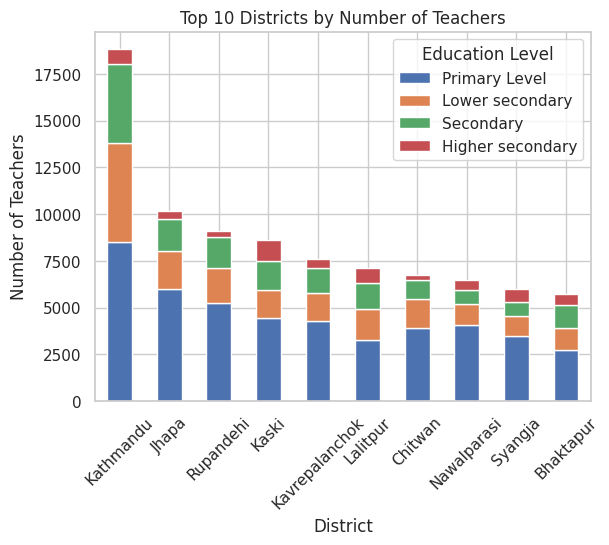

In [ ]:
# Data Visualization

# Imporitng necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Sum the number of teachers for each district across levels
df['Total Teachers'] = df['Primary Level'] + df['Lower secondary'] + df['Secondary'] + df['Higher secondary']

# Sort the dataframe by total teachers and select the top 10 districts
top_districts = df.nlargest(10, 'Total Teachers')

# Plot the data for these top 10 districts
plt.figure(figsize=(12, 8))
top_districts.set_index('District Name')[['Primary Level', 'Lower secondary', 'Secondary', 'Higher secondary']].plot(kind='bar', stacked=True)
plt.title('Top 10 Districts by Number of Teachers')
plt.xlabel('District')
plt.ylabel('Number of Teachers')
plt.legend(title='Education Level')
plt.xticks(rotation=45)
plt.show()

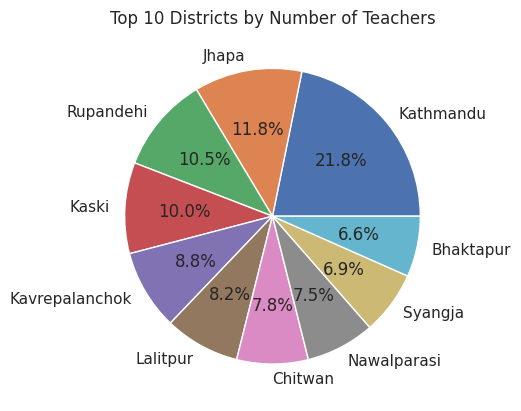

In [ ]:
#Making a pie chart of top 10 disctrict according to number of teachers
plt.pie(top_districts['Total Teachers'], labels=top_districts['District Name'], autopct='%1.1f%%')
plt.title('Top 10 Districts by Number of Teachers')
plt.show()

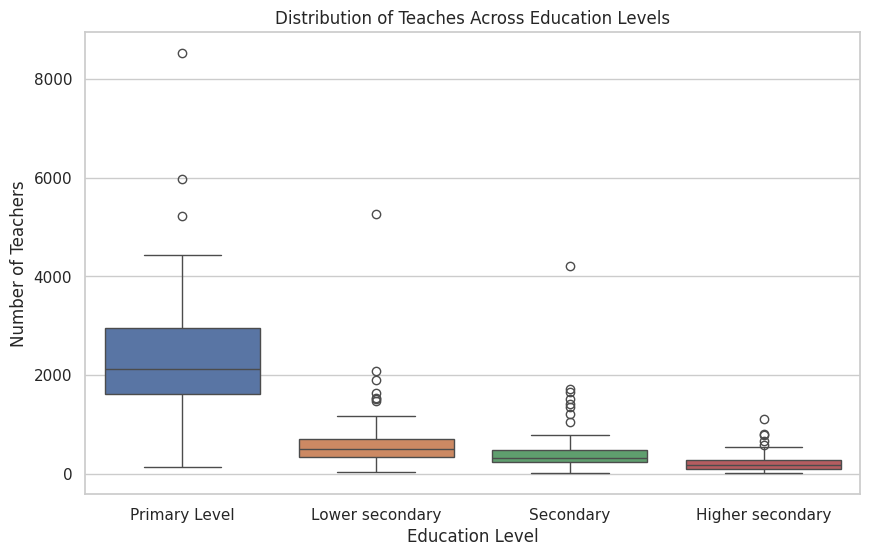

In [ ]:
# Box plot visualization

# setting the style for the plots
sns.set(style = "whitegrid")

plt.figure(figsize = (10, 6))

# box plot for the number of teachera at different levels
sns.boxplot(data = df[['Primary Level', 'Lower secondary', 'Secondary', 'Higher secondary']])

plt.title('Distribution of Teaches Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Teachers')
plt.show()

In [ ]:
df

,District Name,Primary Level,Lower secondary,Secondary,Higher secondary,Total Teachers
0,Taplejung,1646.0,443,232,118,2439.0
1,Sankhuwasabha,1740.0,468,294,120,2622.0
2,Solukhumbu,1159.0,234,164,44,1601.0
3,Panchthar,2264.0,579,341,114,3298.0
4,Ilam,2383.0,698,401,213,3695.0
...,...,...,...,...,...,...
70,Doti,1783.0,467,261,530,3041.0
71,Dadeldhura,1366.0,418,277,90,2151.0
72,Baitadi,2150.0,597,333,144,3224.0
73,Kailali,3848.0,825,443,382,5498.0


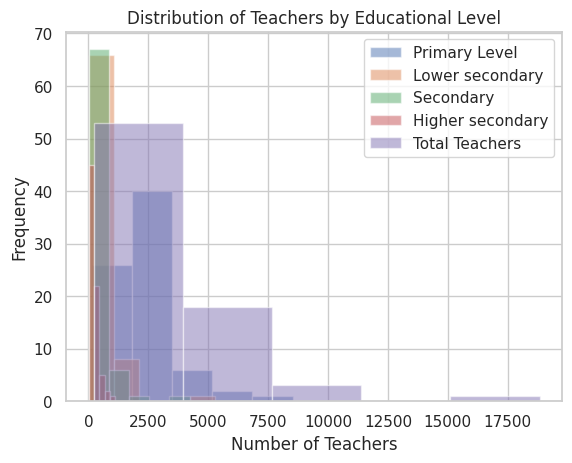

In [ ]:
#importing necessary libraries
import matplotlib.pyplot as plt

# Plot histogram for distribution of teachers by educational level
for column in df.columns[1:]:  # Iterating through each column except the first column (District Name)
    plt.hist(df[column], bins=5, alpha=0.5, label=column)  # bins=5 means the number of intervals, alpha=0.5 means transparency level

#giving titles and legends
plt.xlabel('Number of Teachers')
plt.ylabel('Frequency')
plt.title('Distribution of Teachers by Educational Level')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
# Plotly Visualization

#load necessary libraries
import plotly.figure_factory as ff
import plotly.offline as pyo

# Create DataFrame by converting the dictionary to pandas DataFrame
df = pd.DataFrame(df)

# Prepare data for scatterplot matrix
data_for_matrix = df.loc[:, ["Primary Level", "Lower secondary", "Secondary", "Higher secondary"]]

# adding an index column which contains a range of integers from 1 to no.of rows in data_for_matrix
#used to label the point in satterplot matrix
data_for_matrix['index'] = np.arange(1, len(data_for_matrix) + 1)

# Create scatterplot matrix
fig = ff.create_scatterplotmatrix(
    data_for_matrix,
    diag='box',              # Type of plot for diagonal
    index='index',           # Index to label points on the scatterplot
    colormap='Portland',     # Color map for different categories
    colormap_type='cat',     # Color map type
    height=730,              # Height of the figure
    width=1100               # Width of the figure
)

pyo.iplot(fig)



1.  Primary Level vs. Lower Secondary: Districts with more teachers at the primary level tend to also have more teachers at the lower secondary level.

2.   Primary Level vs. Secondary: More teachers at the primary level might be associated with more teachers at the secondary level.

3.   Primary Level vs. Higher Secondary: There might be a weak or unclear relationship between the number of teachers at the primary level and the number of teachers at the higher secondary level.
4.   Lower Secondary vs. Secondary: Districts with more teachers at the lower secondary level generally have more teachers at the secondary level.


5.   Lower Secondary vs. Higher Secondary: The relationship could be weak, or there might be limited data showing how the number of lower secondary teachers relates to higher secondary teachers.


6.   Secondary vs. Higher Secondary: Districts with more teachers at the secondary level may also have more teachers at the higher secondary level.



In [ ]:
# Plotly Visualization using Bubble Chart

#importing necessary libraries
import plotly.graph_objects as go

# Extract data for plotting
x = df['Primary Level']
y = df['Lower secondary']
size = df['Secondary']  # Number of teachers in Secondary level

# Create the bubble chart
fig = go.Figure(data=[go.Scatter(
    x=x,
    y=y,
    text=df['District Name'],  # Hover text with district information
    mode='markers',
    marker=dict(
        size=size / 10,  # Scale down the size for better visualization
        sizemode='area',
        sizeref=2.*max(size / 10) / (40.**2),
        sizemin=4,
        color=size,
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title='Number of Teachers in Secondary Level')
    )
)])

# Update layout
fig.update_layout(
    title='Bubble Chart of Primary Level vs. Lower Secondary with Secondary Teachers Size',
    xaxis=dict(title='Number of Teachers in Primary Level'),
    yaxis=dict(title='Number of Teachers in Lower Secondary'),
    hovermode='closest'
)

# Plot the figure
fig.show()


# Feature Engineering

A crucial step in the data preprocessing stage is feature engineering, which entails developing new features or altering current ones to enhance the functionality of your machine learning models. We will go over several feature engineering strategies and factors in this part.

## Feature Selection

In [ ]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select the features (independent variables) and the target (dependent variable)
# Predicting the number of teachers at the higher secondary level
X = df[['Primary Level', 'Lower secondary', 'Secondary', 'Total Teachers']]
y = df['Higher secondary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

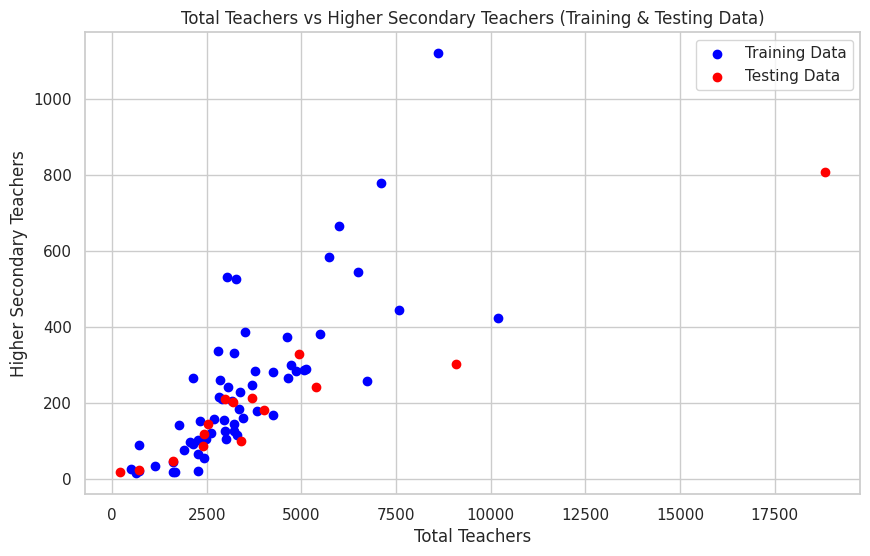

In [ ]:
# Scatter plot for training and testing data using unscaled data for better interpretability
plt.figure(figsize=(10, 6))

# Plotting the training data (X_train and y_train)
plt.scatter(X_train['Total Teachers'], y_train, color='blue', label='Training Data')

# Plotting the testing data (X_test and y_test)
plt.scatter(X_test['Total Teachers'], y_test, color='red', label='Testing Data')

# Setting the title and labels
plt.title('Total Teachers vs Higher Secondary Teachers (Training & Testing Data)')
plt.xlabel('Total Teachers')
plt.ylabel('Higher Secondary Teachers')
plt.legend()
plt.show()

# Modeling and Algorithms

## Model Selection

### 1) Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## Evaluation Metrics

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the scaled testing data
y_test_pred = model.predict(X_test_scaled)

# Extract the Total Teachers feature for plotting (unscaled)
X_test_for_plot = X_test['Total Teachers']

In [ ]:
# Calculate R2 score
r2 = r2_score(y_test, y_test_pred)

# Print R2 score
print(f'R2 Score is: {r2:.2f}')

R2 Score is: 1.00


Correlation Matrix:
                   Primary Level  Lower secondary  Secondary  Total Teachers  \
Primary Level          1.000000         0.904684   0.890325        0.975981   
Lower secondary        0.904684         1.000000   0.987604        0.970134   
Secondary              0.890325         0.987604   1.000000        0.965206   
Total Teachers         0.975981         0.970134   0.965206        1.000000   
Higher secondary       0.706626         0.654742   0.690075        0.745221   

                  Higher secondary  
Primary Level             0.706626  
Lower secondary           0.654742  
Secondary                 0.690075  
Total Teachers            0.745221  
Higher secondary          1.000000  


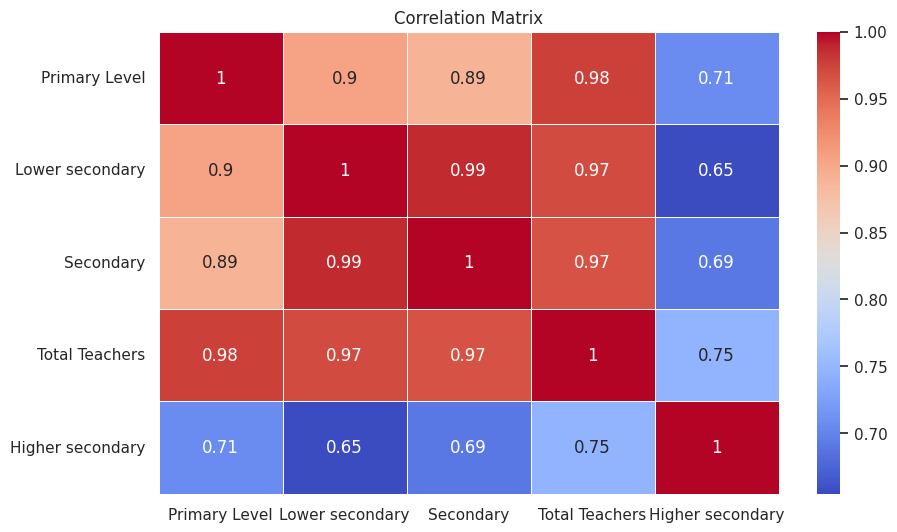

In [ ]:
# Calculate the correlation matrix
corr_matrix = df[['Primary Level', 'Lower secondary', 'Secondary', 'Total Teachers', 'Higher secondary']].corr()

# Print the correlation matrix
print("Correlation Matrix:\n", corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

The correlation matrix shows that all features have a positive relationship with the number of higher secondary teachers. Among them, the total number of teachers has the strongest correlation, indicating it is a key factor in predicting the number of higher secondary teachers.

### 2) Logistic Regression Model

In [ ]:
# importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Define Features and Target
X_log = df[['Primary Level', 'Lower secondary', 'Secondary', 'Total Teachers']]

# Convert the continuous target into a binary categorical variable
# Classifying districts as 'High' or 'Low' based on the median number of higher secondary teachers
median_hs = df['Higher secondary'].median()

# If the number of teachers at the higher secondary level is above the median, it is classified as 1,
# and if the number of teachers is below or equal to 1, it is classified as 0
df['Higher_secondary_binary'] = df['Higher secondary'].apply(lambda x: 1 if x > median_hs else 0)

y_log = df['Higher_secondary_binary']

# Check the distribution of the new target variable
y_log

,Higher_secondary_binary
0,0
1,0
2,0
3,0
4,1
...,...
70,1
71,0
72,0
73,1


In [ ]:
# Split the Data into Training and Testing Sets for Logistic Regression
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Feature Scaling
scaler_log = StandardScaler()
X_log_train_scaled = scaler_log.fit_transform(X_log_train)
X_log_test_scaled = scaler_log.transform(X_log_test)

In [ ]:
# Train the Logistic Regression Model
classifier = LogisticRegression(random_state=42)
classifier.fit(X_log_train_scaled, y_log_train)

LogisticRegression(random_state=42)

In [ ]:
# Make Predictions
y_log_pred = classifier.predict(X_log_test_scaled)  # Get class predictions
y_log_pred_proba = classifier.predict_proba(X_log_test_scaled)[:, 1]  # Get probabilities for class 1

In [ ]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    'Actual Higher Secondary (Binary)': y_log_test,
    'Predicted Higher Secondary (Binary)': y_log_pred
})

# print the comparision
comparison_df

,Actual Higher Secondary (Binary),Predicted Higher Secondary (Binary)
4,1,1
63,1,1
10,1,0
0,0,0
35,0,0
61,0,0
28,0,0
12,1,1
69,0,1
64,0,1


In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_log_test, y_log_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.71      0.71      0.71         7

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15



In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_log_test, y_log_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


In [ ]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_log_test, y_log_pred_proba)
roc_auc = auc(fpr, tpr)

# printing the AUC value
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.91


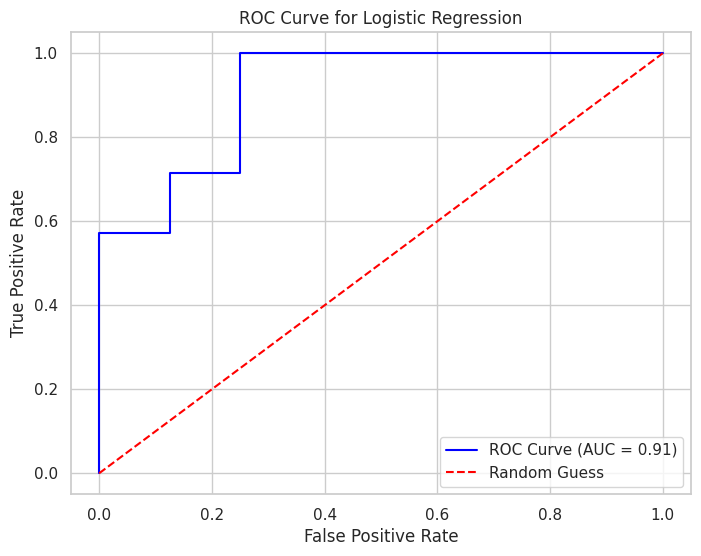

In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

In [ ]:
# Confusion Matrix
# importing necessary libraries for it
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_log_test, y_log_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[6 2]
 [2 5]]


### 3) Gradient Boosting Algorithm

In [ ]:
df

,District Name,Primary Level,Lower secondary,Secondary,Higher secondary,Total Teachers,Higher_secondary_binary
0,Taplejung,1646.0,443,232,118,2439.0,0
1,Sankhuwasabha,1740.0,468,294,120,2622.0,0
2,Solukhumbu,1159.0,234,164,44,1601.0,0
3,Panchthar,2264.0,579,341,114,3298.0,0
4,Ilam,2383.0,698,401,213,3695.0,1
...,...,...,...,...,...,...,...
70,Doti,1783.0,467,261,530,3041.0,1
71,Dadeldhura,1366.0,418,277,90,2151.0,0
72,Baitadi,2150.0,597,333,144,3224.0,0
73,Kailali,3848.0,825,443,382,5498.0,1


In [ ]:
# importing necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Define Features and Target
input_features_xgb = df[['Primary Level', 'Lower secondary', 'Secondary', 'Total Teachers']]
target_xgb = df['Higher_secondary_binary']  # Assuming this is the target

# Train-test split
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(input_features_xgb, target_xgb, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
clf_xgb = XGBClassifier(random_state=42)
clf_xgb.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict and evaluate
y_train_pred_xgb = clf_xgb.predict(X_train_xgb)
y_test_pred_xgb = clf_xgb.predict(X_test_xgb)

train_accuracy_xgb = accuracy_score(y_train_xgb, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test_xgb, y_test_pred_xgb)

In [ ]:
print(f"XGBoost Training Accuracy: {round(train_accuracy_xgb * 100, 1)}%")
print(f"XGBoost Testing Accuracy: {round(test_accuracy_xgb * 100, 1)}%")

XGBoost Training Accuracy: 96.7%
XGBoost Testing Accuracy: 80.0%


<Figure size 1000x800 with 0 Axes>

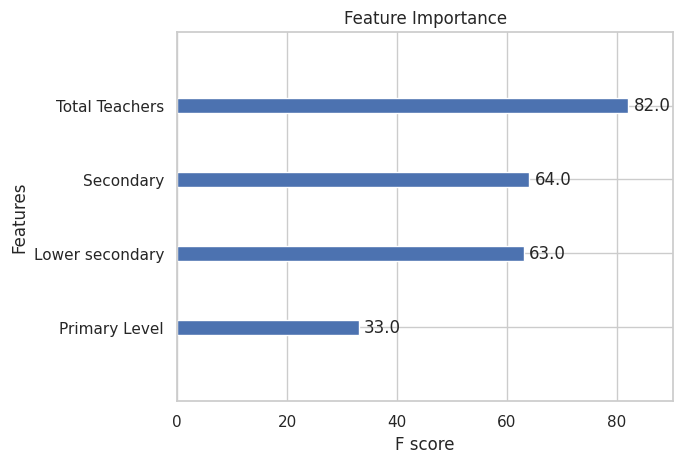

In [ ]:
# Plot the feature importance, which helps to understand which features (input variables) are contributing the most to making predictions.
from xgboost import plot_importance

# plotting the figure
plt.figure(figsize=(10, 8))
plot_importance(clf_xgb)
plt.title('Feature Importance')
plt.show()

### 4) Decision Tree Algorithm

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define Features and Target
features = df[['Primary Level', 'Lower secondary', 'Secondary', 'Total Teachers']]
binary_target = df['Higher_secondary_binary']

# Train-test split for Decision Tree
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(features, binary_target, test_size=0.2, random_state=42)

# Train Decision Tree on binary classification task
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Evaluate the model
train_accuracy_dt = dt_classifier.score(X_train_dt, y_train_dt)
test_accuracy_dt = dt_classifier.score(X_test_dt, y_test_dt)

print(f"Decision Tree Training Accuracy: {round(train_accuracy_dt * 100, 1)}%")
print(f"Decision Tree Testing Accuracy: {round(test_accuracy_dt * 100, 1)}%")

Decision Tree Training Accuracy: 98.3%
Decision Tree Testing Accuracy: 93.3%


# Results Presentation

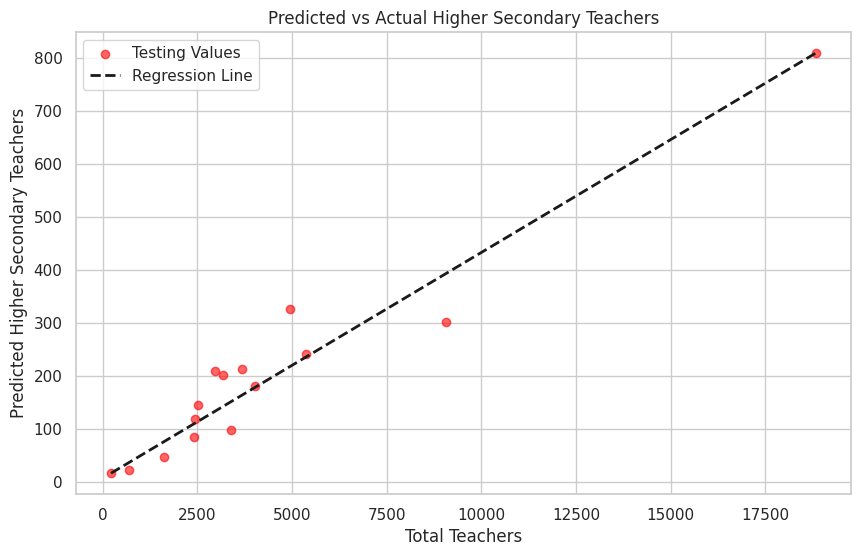

In [ ]:
# Plot for Testing Data (Actual vs Predicted Higher Secondary Teachers based on Total Teachers)
plt.figure(figsize=(10, 6))

# Scatter plot of testing
plt.scatter(X_test_for_plot, y_test, color='red', label='Testing Values', alpha=0.6)

# Plot the regression line (perfect predictions)
plt.plot([X_test_for_plot.min(), X_test_for_plot.max()],
         [y_test_pred.min(), y_test_pred.max()],
         'k--', lw=2, label='Regression Line')

# Set plot titles and labels
plt.title('Predicted vs Actual Higher Secondary Teachers')
plt.xlabel('Total Teachers')
plt.ylabel('Predicted Higher Secondary Teachers')
plt.legend()
plt.show()

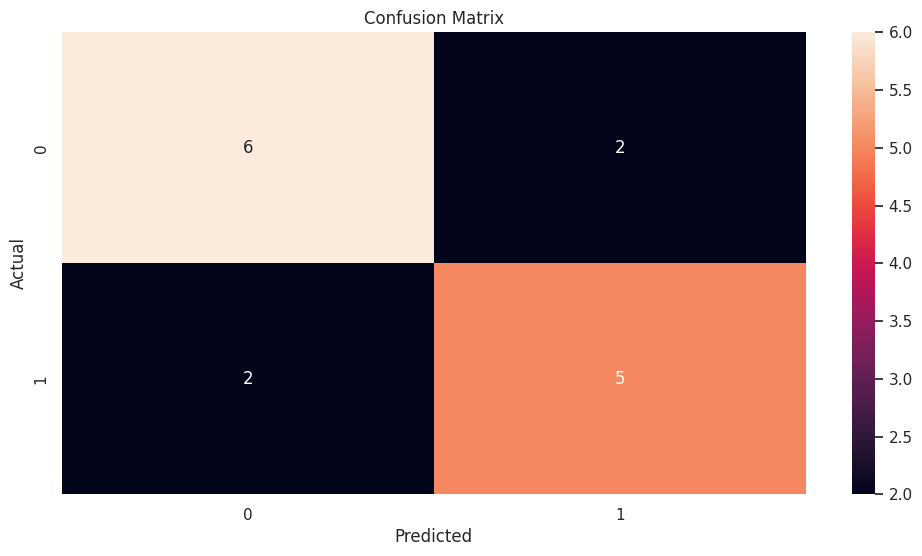

In [ ]:
# plotting confusion matrix for logistic regression
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

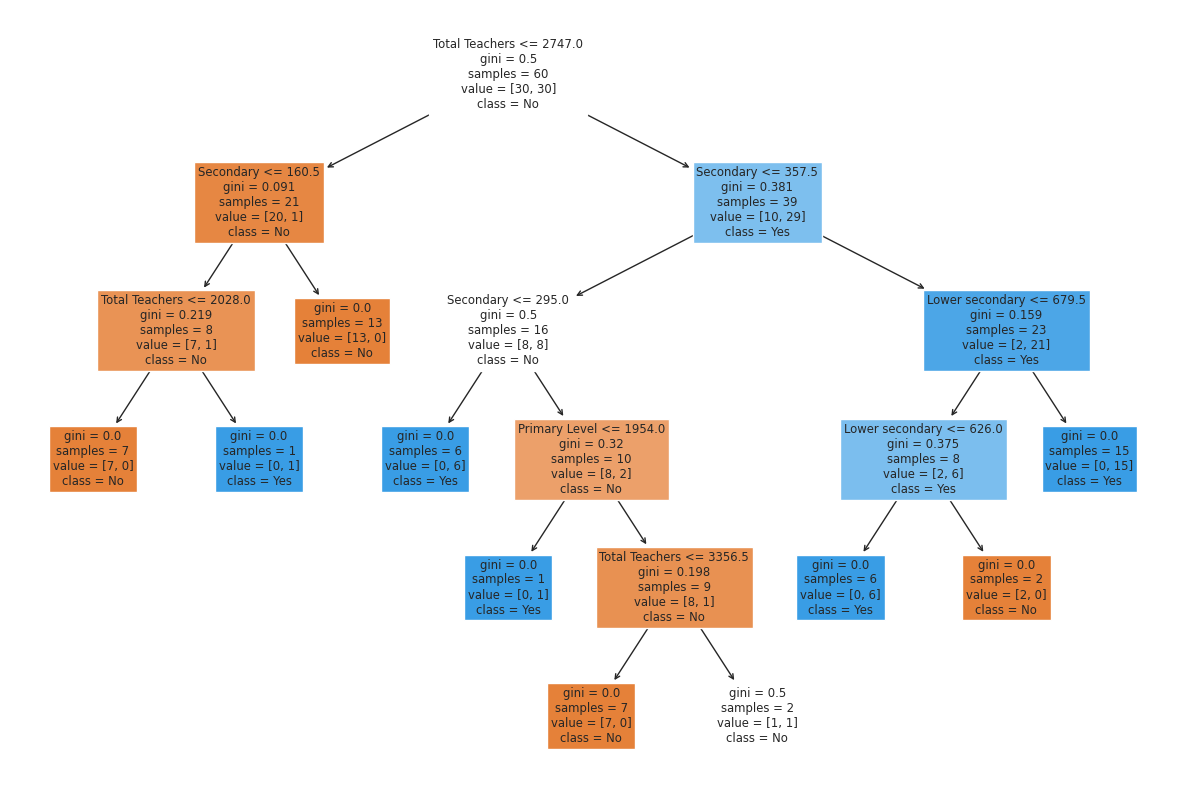

In [ ]:
# Plot the Decision Tree
plt.figure(figsize=(15, 10))  # Set the figure size
plot_tree(dt_classifier, feature_names=features.columns, class_names=['No', 'Yes'], filled=True)
plt.show()